In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import re

import warnings
warnings.filterwarnings('ignore')

In [68]:
rooth = 'data/'
travels = pd.read_csv(rooth + 'Train.csv')

In [69]:
travels.head()

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0


In [70]:
# Shape
travels.shape

(21000, 15)

In [71]:
# Variables Type
travels.dtypes

Uniq Id                        object
Package Name                   object
Package Type                   object
Destination                    object
Itinerary                      object
Places Covered                 object
Travel Date                    object
Hotel Details                  object
Start City                     object
Airline                        object
Flight Stops                    int64
Meals                           int64
Sightseeing Places Covered     object
Cancellation Rules             object
Per Person Price              float64
dtype: object

In [72]:
# Info
travels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Uniq Id                     21000 non-null  object 
 1   Package Name                21000 non-null  object 
 2   Package Type                21000 non-null  object 
 3   Destination                 21000 non-null  object 
 4   Itinerary                   21000 non-null  object 
 5   Places Covered              21000 non-null  object 
 6   Travel Date                 21000 non-null  object 
 7   Hotel Details               21000 non-null  object 
 8   Start City                  21000 non-null  object 
 9   Airline                     21000 non-null  object 
 10  Flight Stops                21000 non-null  int64  
 11  Meals                       21000 non-null  int64  
 12  Sightseeing Places Covered  21000 non-null  object 
 13  Cancellation Rules          210

In [73]:
# Null values
travels.isnull().sum()

Uniq Id                       0
Package Name                  0
Package Type                  0
Destination                   0
Itinerary                     0
Places Covered                0
Travel Date                   0
Hotel Details                 0
Start City                    0
Airline                       0
Flight Stops                  0
Meals                         0
Sightseeing Places Covered    0
Cancellation Rules            0
Per Person Price              0
dtype: int64

In [74]:
# Unique values and value counts
for travel in travels.columns:
    print(f'UUNIQUE VALUES {travel}: {travels[travel].nunique()}')
    print(f'{travels[travel].value_counts()}')
    print('---------------------------------------------------------')

UUNIQUE VALUES Uniq Id: 21000
6c1be509b21ab189f01906014eb453fd    1
3db6fd91f225e90535e3acf9ee66e05f    1
bcb24a76125cb40a04f111135db3a6cb    1
93373f4ab617b7e259c5b28b078bc361    1
dffdcfaf2255bb1a6bbba7b28ee66284    1
                                   ..
4d4ec72413122c661b61fe88174dbd9a    1
8c775172a7ad8995e64a6d8f861b0685    1
fa1a96d3484a76e516dc801c438f7fbc    1
9118d0dc7e07203d321ac81fc816f058    1
0d7d9e8c6fe4a7b38e5c78d41823fd76    1
Name: Uniq Id, Length: 21000, dtype: int64
---------------------------------------------------------
UUNIQUE VALUES Package Name: 2204
Holiday in Manali & Chandigarh from Chandigarh                  37
Bali Special 4 Nights                                           36
Honeymoon Special - Bangkok Phuket & Krabi                      35
Serene Uttarakhand with Kausani                                 33
Ultimate Himachal Holiday                                       32
                                                                ..
Experiential Go

UUNIQUE VALUES Cancellation Rules: 10
Cancellation any time after making the 1st payment instalment till the 2nd payment date:The entire amount paid as 1st payment instalment (deposit) would be non-refundable.Cancellation after 2nd payment instalment and before 3rd or final payment date:The total amount that was due at the 2nd payment instalment as per your payment schedule would be non-refundable; anything that you have paid over and above this amount would be refundable.Cancellation after 3rd or final payment date:The full amount paid by you would be non-refundable.                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [75]:
travels.describe(include='all') # We only have 3 continuous variables (1 is our target)

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
count,21000,21000,21000,21000,21000,21000,21000,21000,21000,21000,21000.000000,21000.000000,21000,21000,21000.000000
unique,21000,2204,5,565,966,565,495,6060,2,314,NaN,NaN,1714,10,NaN
top,6c1be509b21ab189f01906014eb453fd,Holiday in Manali & Chandigarh from Chandigarh,Deluxe,Goa,3N Goa,Goa,19-06-2021,Not Available,New Delhi,Not Available,NaN,NaN,Not Available,Cancellation any time after making the 1st pay...,NaN
freq,1,37,6006,973,453,973,79,2929,13733,4910,NaN,NaN,1623,17574,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.870286,3.665429,NaN,NaN,20059.330381
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.834989,0.893631,NaN,NaN,11643.641766
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2.000000,NaN,NaN,791.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,3.000000,NaN,NaN,12461.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,17765.500000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,5.000000,NaN,NaN,25081.375000


##### Train Test Split before feature exploration. We will use the test for validation, and then see if our model generalizes well in the given test set by the hackathon

In [76]:
X = travels.drop(columns=['Per Person Price', 'Uniq Id'])
y = travels['Per Person Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16800, 13), (4200, 13), (16800,), (4200,))

In [78]:
X_train.columns

Index(['Package Name', 'Package Type', 'Destination', 'Itinerary',
       'Places Covered', 'Travel Date', 'Hotel Details', 'Start City',
       'Airline', 'Flight Stops', 'Meals', 'Sightseeing Places Covered',
       'Cancellation Rules'],
      dtype='object')

In [79]:
# See columns where str 'Not Available' is present
for travel in X_train.columns:
    try:
        if X_train[travel].str.contains('Not Available').any():
            print (travel)
            print(X_train[travel].str.contains('Not Available').value_counts())
    except:
        pass

# We have 4 columns where the str 'Not Available is present' 

Hotel Details
False    14410
True      2390
Name: Hotel Details, dtype: int64
Airline
False    12817
True      3983
Name: Airline, dtype: int64
Sightseeing Places Covered
False    15480
True      1320
Name: Sightseeing Places Covered, dtype: int64
Cancellation Rules
False    16154
True       646
Name: Cancellation Rules, dtype: int64


In [80]:
cat_var = ['Package Name', 'Package Type', 'Destination', 'Itinerary',
           'Places Covered', 'Travel Date', 'Hotel Details', 'Start City',
           'Airline', 'Sightseeing Places Covered',
           'Cancellation Rules']
X_train[cat_var].head()

,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Sightseeing Places Covered,Cancellation Rules
15345,"Pilgrimage tour to Thanjavur, Kumbakonam & Tir...",Premium,Tanjore|Kumbakonam|Tiruchirapally,1N Tanjore . 1N Kumbakonam . 1N Tiruchirapally,Tanjore|Kumbakonam|Tiruchirapally,10-05-2021,Sangam Hotel:4.4|Vinayaga by Poppys:3.8|Red Fo...,New Delhi,IndiGo|Spicejet,Not Available,Cancellation any time after making the 1st pay...
8476,Ultimate Himachal from Delhi(with Flights),Deluxe,Parwanoo|Shimla|Chail|Kasauli,1N Parwanoo . 3N Shimla . 2N Chail . 1N Kasauli,Parwanoo|Shimla|Chail|Kasauli,06-02-2021,Timber Trail Heights:3.8|Summit Thistle Villa ...,New Delhi,Spicejet,Viceregal Lodge | Mall road | Sadhu Pul | Cri...,Cancellation any time after making the 1st pay...
9052,A Vacation to South,Deluxe,Mysore|Coorg|Ooty,1N Mysore . 2N Coorg . 2N Ooty,Mysore|Coorg|Ooty,10-03-2021,"The Quorum:3.5|Club Mahindra Virajpet, Coorg:4...",New Delhi,Air India|Spicejet,Mysore Palace | Chamundi Hills | Dubare Eleph...,Cancellation any time after making the 1st pay...
17206,Self Drive Trip - Exploring Mughal Agra from D...,Premium,Agra,2N Agra,Agra,05-06-2021,Not Available,New Delhi,Not Available,Self Drive SUV for 2 days from Delhi,This cancellation policy is applicable for boo...
16188,Best of South India (Hotel & Car) - Value Added,Standard,Madurai|Rameshwaram|Kanyakumari|Kovalam and Po...,1N Madurai . 1N Rameshwaram . 1N Kanyakumari ....,Madurai|Rameshwaram|Kanyakumari|Kovalam and Po...,28-04-2021,Not Available,Mumbai,Not Available,Meenakshi Temple | Madurai Temple Darshan (Wi...,Cancellation any time after making the 1st pay...


In [81]:
# See if 'Destination' and 'Places Covered' columns are the same (by looking at the df it looks so)
X_train['Destination'].equals(X_train['Places Covered'])

True

In [82]:
# Drop column of Places Covered and Date Travel column to date_time
X_train.drop(columns='Places Covered', inplace=True)
X_test.drop(columns='Places Covered', inplace=True)
X_train['Travel Date'] = pd.to_datetime(X_train['Travel Date'])
X_test['Travel Date'] = pd.to_datetime(X_train['Travel Date'])

### Let's just first explore if all the packages with the same name have the same conditions (destination, itinerary, places covered). The others we can see that aren't always the same

In [83]:
X_train.columns

Index(['Package Name', 'Package Type', 'Destination', 'Itinerary',
       'Travel Date', 'Hotel Details', 'Start City', 'Airline', 'Flight Stops',
       'Meals', 'Sightseeing Places Covered', 'Cancellation Rules'],
      dtype='object')

In [84]:
# Interest Columns
cols = ['Destination', 'Itinerary', 'Sightseeing Places Covered']
for package in pd.unique(X_train['Package Name']):
    temp = X_train[X_train['Package Name'] == package]
    for col in temp[cols]:
            #print(col)
        if len(np.unique(temp[col]))==1:
            pass
        else: 
            print(package)
            print(f'{col} Not all values are the same')
            print('---------------------------------------------------------')

Best of Kashmir
Destination Not all values are the same
---------------------------------------------------------
Best of Kashmir
Itinerary Not all values are the same
---------------------------------------------------------
Best of Kashmir
Sightseeing Places Covered Not all values are the same
---------------------------------------------------------
Port Blair and Havelock Scuba Dive Special - 4 Nights
Sightseeing Places Covered Not all values are the same
---------------------------------------------------------
Port Blair, Havelock in 5 Nights with Parasailing
Sightseeing Places Covered Not all values are the same
---------------------------------------------------------
Northeast Wow Darjeeling & Gangtok - Winter Special
Sightseeing Places Covered Not all values are the same
---------------------------------------------------------
Gangtok Pelling & Darjeeling - Winter Special
Sightseeing Places Covered Not all values are the same
-------------------------------------------------

Charismatic Kashmir with Gulmarg
Sightseeing Places Covered Not all values are the same
---------------------------------------------------------
Wonders Of Kashmir
Itinerary Not all values are the same
---------------------------------------------------------
Wonders Of Kashmir
Sightseeing Places Covered Not all values are the same
---------------------------------------------------------
Leisurely Retreat in Divine Dharamshala
Sightseeing Places Covered Not all values are the same
---------------------------------------------------------
Mauritius & Seychelles in a Nutshell - Seychelles
Sightseeing Places Covered Not all values are the same
---------------------------------------------------------
Leisurely Sri Lanka - Negombo Special
Sightseeing Places Covered Not all values are the same
---------------------------------------------------------
Singapore & Kuala Lumpur Theme Park Special
Sightseeing Places Covered Not all values are the same
-----------------------------------------

Trip to Aurangabad, Shirdi & Shani Shingnapur
Sightseeing Places Covered Not all values are the same
---------------------------------------------------------
Hill Getaway - Trip to Scenic Ooty by Bus from Chennai
Sightseeing Places Covered Not all values are the same
---------------------------------------------------------
Astonishing Andaman 6 Nights
Sightseeing Places Covered Not all values are the same
---------------------------------------------------------
A Journey to Mysore Coorg and Ooty ( Honeymoon Special )
Sightseeing Places Covered Not all values are the same
---------------------------------------------------------
Jaipur - A Bike Trip to Sambhar Salt Lake (Online)
Sightseeing Places Covered Not all values are the same
---------------------------------------------------------
Experience Trout Fishing in Manali - Volvo Tickets included
Sightseeing Places Covered Not all values are the same
---------------------------------------------------------
Holiday In Kuala Lumpur 

Golden Triangle with Pushkar Holiday
Sightseeing Places Covered Not all values are the same
---------------------------------------------------------
Best of Copenhagen and Moscow
Sightseeing Places Covered Not all values are the same
---------------------------------------------------------
Jaisalmer - Sun, Sand and You ! Without Flight (Online)
Sightseeing Places Covered Not all values are the same
---------------------------------------------------------
Long Weekend Special- Andaman Delight
Sightseeing Places Covered Not all values are the same
---------------------------------------------------------
Honeymoon in Andaman - With Romantic Dinner
Sightseeing Places Covered Not all values are the same
---------------------------------------------------------
A weekend visit to Bentota and Colombo
Sightseeing Places Covered Not all values are the same
---------------------------------------------------------
Made in Heaven - Majestic South
Sightseeing Places Covered Not all values are 

In [85]:
## We can see that not all the features of a given package are always the same

### Do a simple base model with the given data

In [86]:
X_train.dtypes

Package Name                          object
Package Type                          object
Destination                           object
Itinerary                             object
Travel Date                   datetime64[ns]
Hotel Details                         object
Start City                            object
Airline                               object
Flight Stops                           int64
Meals                                  int64
Sightseeing Places Covered            object
Cancellation Rules                    object
dtype: object

In [87]:
from sklearn.preprocessing import LabelEncoder
cat_cols = X_train.select_dtypes('object')
lb = LabelEncoder()
for col in cat_cols:
    X_train[col] = lb.fit_transform(X_train[col])
    X_test[col] = lb.transform(X_test[col])

ValueError: y contains previously unseen labels: 'Jaipur - Unique Stay'

In [88]:
cat_cols.columns

Index(['Package Name', 'Package Type', 'Destination', 'Itinerary',
       'Hotel Details', 'Start City', 'Airline', 'Sightseeing Places Covered',
       'Cancellation Rules'],
      dtype='object')

In [62]:
X_test

,Package Name,Package Type,Destination,Itinerary,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules
2312,Marvellous Kashmir Vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 2N Srinagar,NaT,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,Go Air,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...
16845,Splendid North East - Pelling and Namchi (With...,Standard,Gangtok|Pelling|Namchi,3N Gangtok . 2N Pelling . 1N Namchi,NaT,Summit Namnang Courtyard & Spa:4|Summit Newa R...,New Delhi,Not Available,2,3,Changu Lake - Excursion | Baba Mandir | Rumte...,Cancellation any time after making the 1st pay...
6105,Sri Lanka - 4 Cities Special,Standard,Kandy|Nuwara Eliya|Bentota|Colombo,2N Kandy . 2N Nuwara Eliya . 2N Bentota . 1N C...,NaT,Oak Ray City Hotel-MMT HOLIDAYS SPECIAL:4|Heav...,New Delhi,IndiGo|IndiGo|IndiGo|IndiGo,2,3,Pinnawala Elephant Orphanage | Temple of Toot...,Cancellation any time after making the 1st pay...
18082,"Beaches, backwaters and Hills of Kerala",Standard,Kovalam and Poovar|Allepey|Munnar,2N Kovalam and Poovar . 1N Allepey . 2N Munnar,NaT,"Sagara Beach Resort:3.8|Camelot Hotel, Alleppe...",New Delhi,IndiGo|Spicejet,2,3,Zoological Park | Napier Museum | Hawa Beach ...,Cancellation any time after making the 1st pay...
11335,Bali Special 4 Nights,Premium,Bali,4N Bali,NaT,The Anvaya Beach Resort Bali - MMT Special:Five,Mumbai,Malaysia Airlines|Malaysia Airlines|Malaysia A...,0,5,Guided Tanah Lot Tour at Sunset with Private ...,Cancellation any time after making the 1st pay...
...,...,...,...,...,...,...,...,...,...,...,...,...
12186,Dharamshala Getaway from Chandigarh - View a H...,Deluxe,Dharamshala,2N Dharamshala,NaT,Not Available,New Delhi,Not Available,1,3,Dalai Lama temple | Bhagsu falls | Church of ...,Not Available
16275,A Blissful holiday in Himachal from Chandigarh...,Luxury,Chandigarh|Manali|Shimla,1N Chandigarh . 3N Manali . 2N Shimla,NaT,Ramada Plaza Chandigarh:4.1|Larisa Resort:4.6|...,Mumbai,Air India,0,4,Sukhna Lake | Rock Garden | Pandoh Dam | Hadi...,Cancellation any time after making the 1st pay...
11573,Goa 4N - with transfers (South Goa),Premium,Goa,4N Goa,NaT,SeaShell Beach Suites:4.1,Mumbai,IndiGo,0,5,Not Available,Cancellation any time after making the 1st pay...
5927,Essential North East,Standard,Pelling|Gangtok|Lachung|Gangtok,1N Pelling . 2N Gangtok . 1N Lachung . 1N Gangtok,NaT,Summit Newa Regency:3.9|Mount Himalayan Hotel ...,New Delhi,IndiGo,2,3,Helipad Viewpoint | Rimbi Waterfall | Darap V...,Cancellation any time after making the 1st pay...


#### Let's first prepare our data

In [420]:
def prepare_dest_airline_sight_hotel(df, columns):
    
    for column in df[columns]:
        # Empty list for the number of occurances in each column
        max_column = []

        # Split by the separator 
        df[f'{column}_split'] = df[column].str.split('|')

        # Know the maximum lenght presented on the list created
        for i in df[f'{column}_split']:
            max_column.append(len(i))     
        max_lenght = max(max_column)

        # Create new columns for each of destination, airlines, sigtseeings and hotels
        for n in range(0, max_lenght):
            df[f'{column}_{n+1}'] = df[column].str.split('|', expand=True)[n]

        # Drop original column and Column_split
        df.drop(columns=[column, f'{column}_split'], inplace=True)

        # Fill null values with 0
        df.fillna(0, inplace = True)

    return df

In [421]:
# Prepare "Itinerary" column - nº of nights
def itinerary(df):
    
    nights_list = []
    
    # Use regex to find the different number of nights in each destination
    for i in df['Itinerary']:
        n_nights = re.findall(r'[0-9]+', i)
        nights_list.append(n_nights)

    temp = pd.DataFrame(nights_list)

    # Rename Columns
    for i, column in enumerate(temp.columns):
        temp.rename(columns = {column: f'Nights_destination_{i+1}'}, inplace = True)

    # Fill null values with 0
    temp.fillna(0, inplace = True)
    temp = temp.astype('int64')
    
    # Prepare temp with thesame index as initial df
    index_df = df.index
    temp.set_index(index_df, inplace=True)
    
    # Joint
    df_ = df.join(temp)
    
    # Drop Itinerary Column
    df_final = df_.drop(columns=['Itinerary'])
    
    # Compute Total Nights
    df_final["Total_nights"] = temp.sum(axis=1)
    
    return df_final


In [422]:
X_train = prepare_dest_airline_sight_hotel(X_train, ['Destination', 'Airline', 'Sightseeing Places Covered', 'Hotel Details'])

In [423]:
X_train = itinerary(X_train)

In [427]:
X_train.head()

,Package Name,Package Type,Travel Date,Start City,Flight Stops,Meals,Cancellation Rules,Destination_1,Destination_2,Destination_3,...,Nights_destination_3,Nights_destination_4,Nights_destination_5,Nights_destination_6,Nights_destination_7,Nights_destination_8,Nights_destination_9,Nights_destination_10,Nights_destination_11,Total_nights
15345,"Pilgrimage tour to Thanjavur, Kumbakonam & Tir...",Premium,10-05-2021,New Delhi,0,5,Cancellation any time after making the 1st pay...,Tanjore,Kumbakonam,Tiruchirapally,...,1,0,0,0,0,0,0,0,0,3
8476,Ultimate Himachal from Delhi(with Flights),Deluxe,06-02-2021,New Delhi,1,3,Cancellation any time after making the 1st pay...,Parwanoo,Shimla,Chail,...,2,1,0,0,0,0,0,0,0,7
9052,A Vacation to South,Deluxe,10-03-2021,New Delhi,1,3,Cancellation any time after making the 1st pay...,Mysore,Coorg,Ooty,...,2,0,0,0,0,0,0,0,0,5
17206,Self Drive Trip - Exploring Mughal Agra from D...,Premium,05-06-2021,New Delhi,0,5,This cancellation policy is applicable for boo...,Agra,0,0,...,0,0,0,0,0,0,0,0,0,2
16188,Best of South India (Hotel & Car) - Value Added,Standard,28-04-2021,Mumbai,2,3,Cancellation any time after making the 1st pay...,Madurai,Rameshwaram,Kanyakumari,...,1,2,0,0,0,0,0,0,0,5


<AxesSubplot:xlabel='Travel Date', ylabel='Total_nights'>

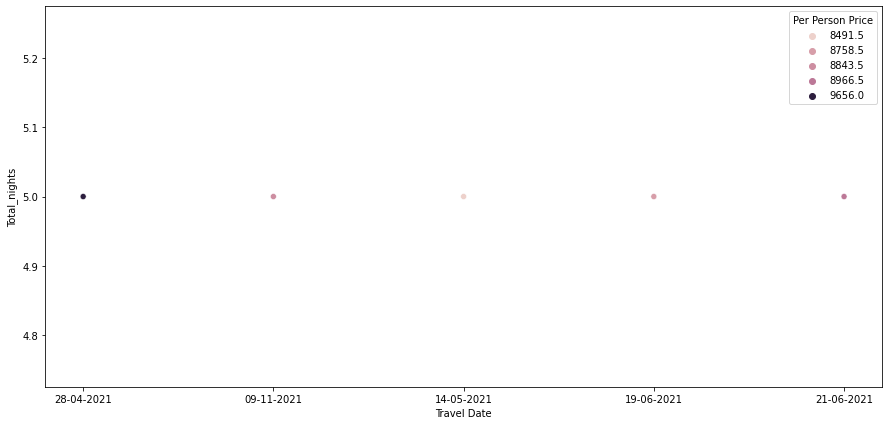

In [453]:
# Let's see if it makes sense to create a colums of the season of the year. Usually travels are more expensive in the summer.
# Lets compare the same packages
temp_ = X_train.join(y_train)
temp = temp_[temp_['Package Name'] == 'Best of South India (Hotel & Car) - Value Added']

# See when people will travel the most and if it is more expensive due to the season
plt.figure(figsize=(15,7))
sns.scatterplot(temp['Travel Date'], temp['Total_nights'], temp['Per Person Price'])